In [1]:
%%capture
!pip install wordcloud

In [2]:
import os
import sys


parent_directory = os.path.abspath('..')
sys.path.append(parent_directory)

from Preprocess import preprocess
# Run the preprocessing 
df= preprocess('Data/articles.json')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/faculty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/faculty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/faculty/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


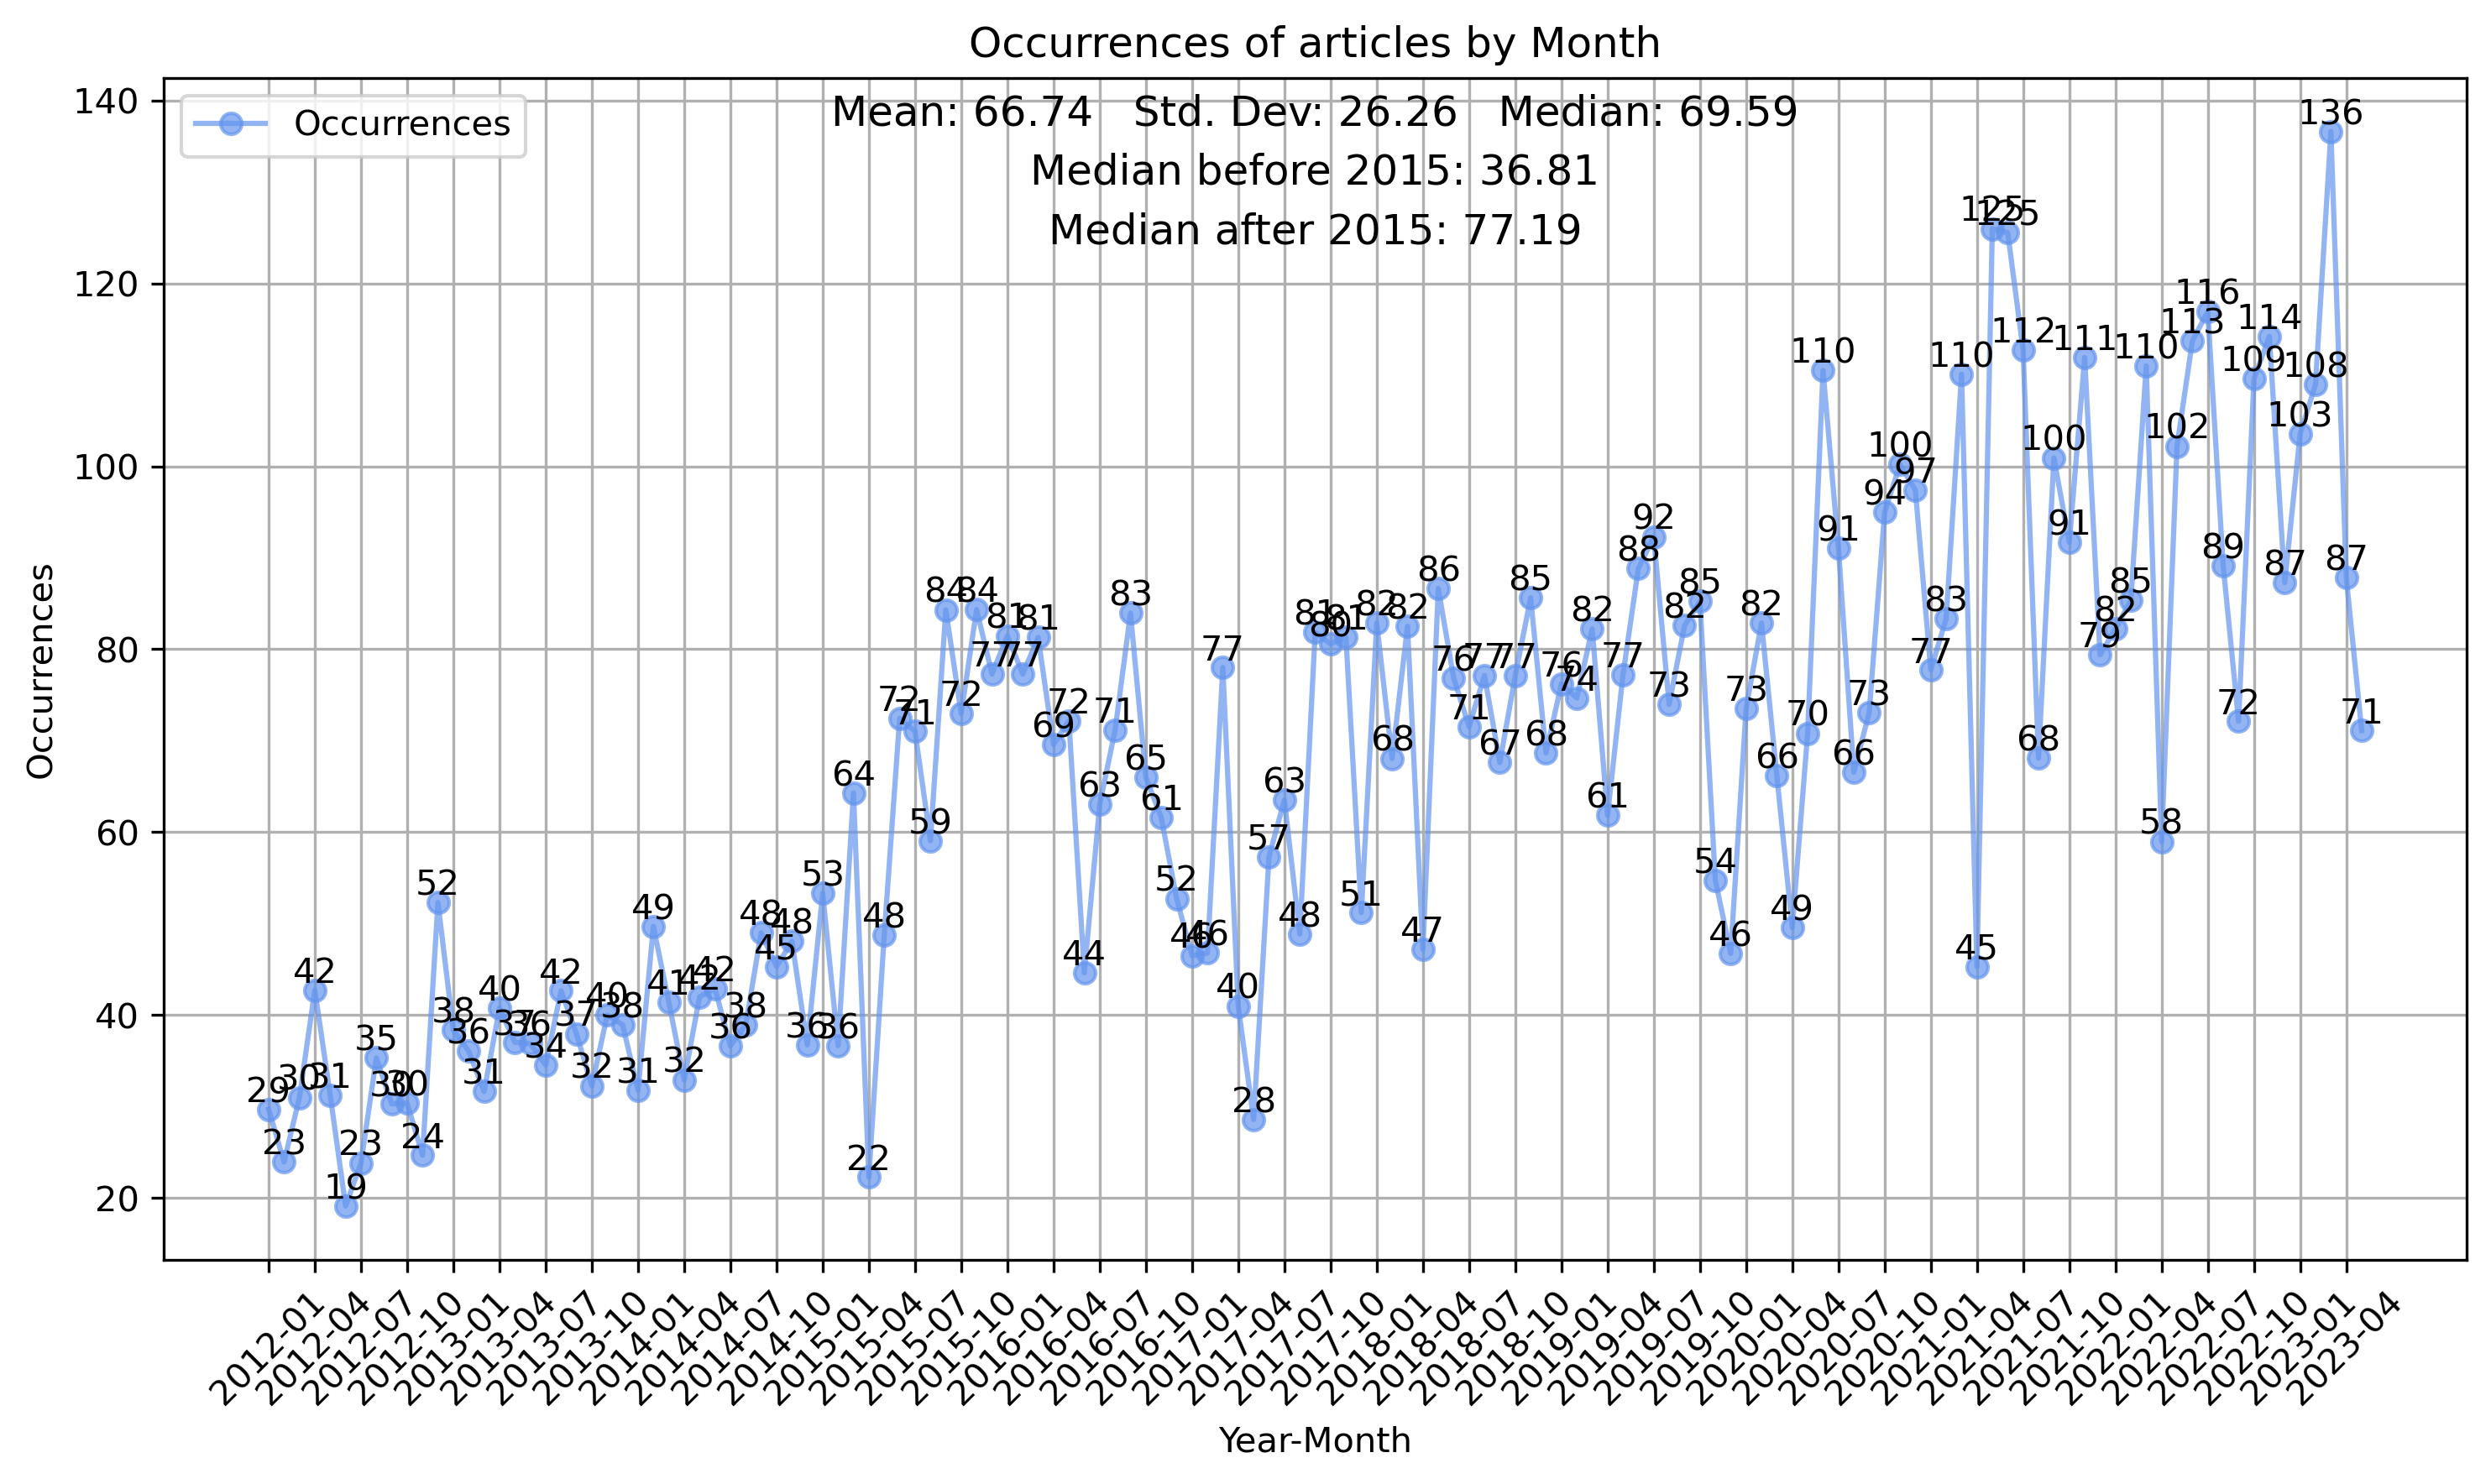

In [96]:
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

# Convert the 'year-month' column to a pandas PeriodIndex
df['year-month'] = pd.PeriodIndex(df['year-month'], freq='M')

# Group the data by month and count the occurrences
monthly_counts= df['year-month'].value_counts().sort_index()

# Convert the Period object to a string representation
monthly_counts.index = monthly_counts.index.astype(str)

# Filter the DataFrame for dates from 2015 onwards
start_date = '2015-01'
monthly_counts_filtered = monthly_counts[start_date:]

# Create a line plot to visualize the occurrence of months
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(monthly_counts_filtered.index, monthly_counts_filtered.values, marker='o', linestyle='-', color='b')

# Set labels and title for the plot
plt.xlabel('Year-Month')
plt.ylabel('Occurrences')
plt.title('Occurrences of articles by Month')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Select a subset of x-axis labels to display
x_ticks = monthly_counts_filtered.index[::3]  # Show labels for every 3 months
plt.xticks(x_ticks)

# Add gridlines
plt.grid(True)

# Add data labels
for i, value in enumerate(monthly_counts_filtered.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Add a legend
plt.legend(['Occurrences'])

# Add a tight layout
plt.tight_layout()

# Save the plot as an image file using PIL
fig = plt.gcf()
fig.savefig('/project/Old_Version/my_dir/Fausse-repose/Topic-Modelling-for-the-EA-2021/Data/Png/plot_occurences.png', dpi=300, bbox_inches='tight')

# Close the plot
plt.close()

# Open the saved image
image = Image.open('/project/Old_Version/my_dir/Fausse-repose/Topic-Modelling-for-the-EA-2021/Data/Png/plot_occurences.png')
image.show()


# Plot the content of the articles

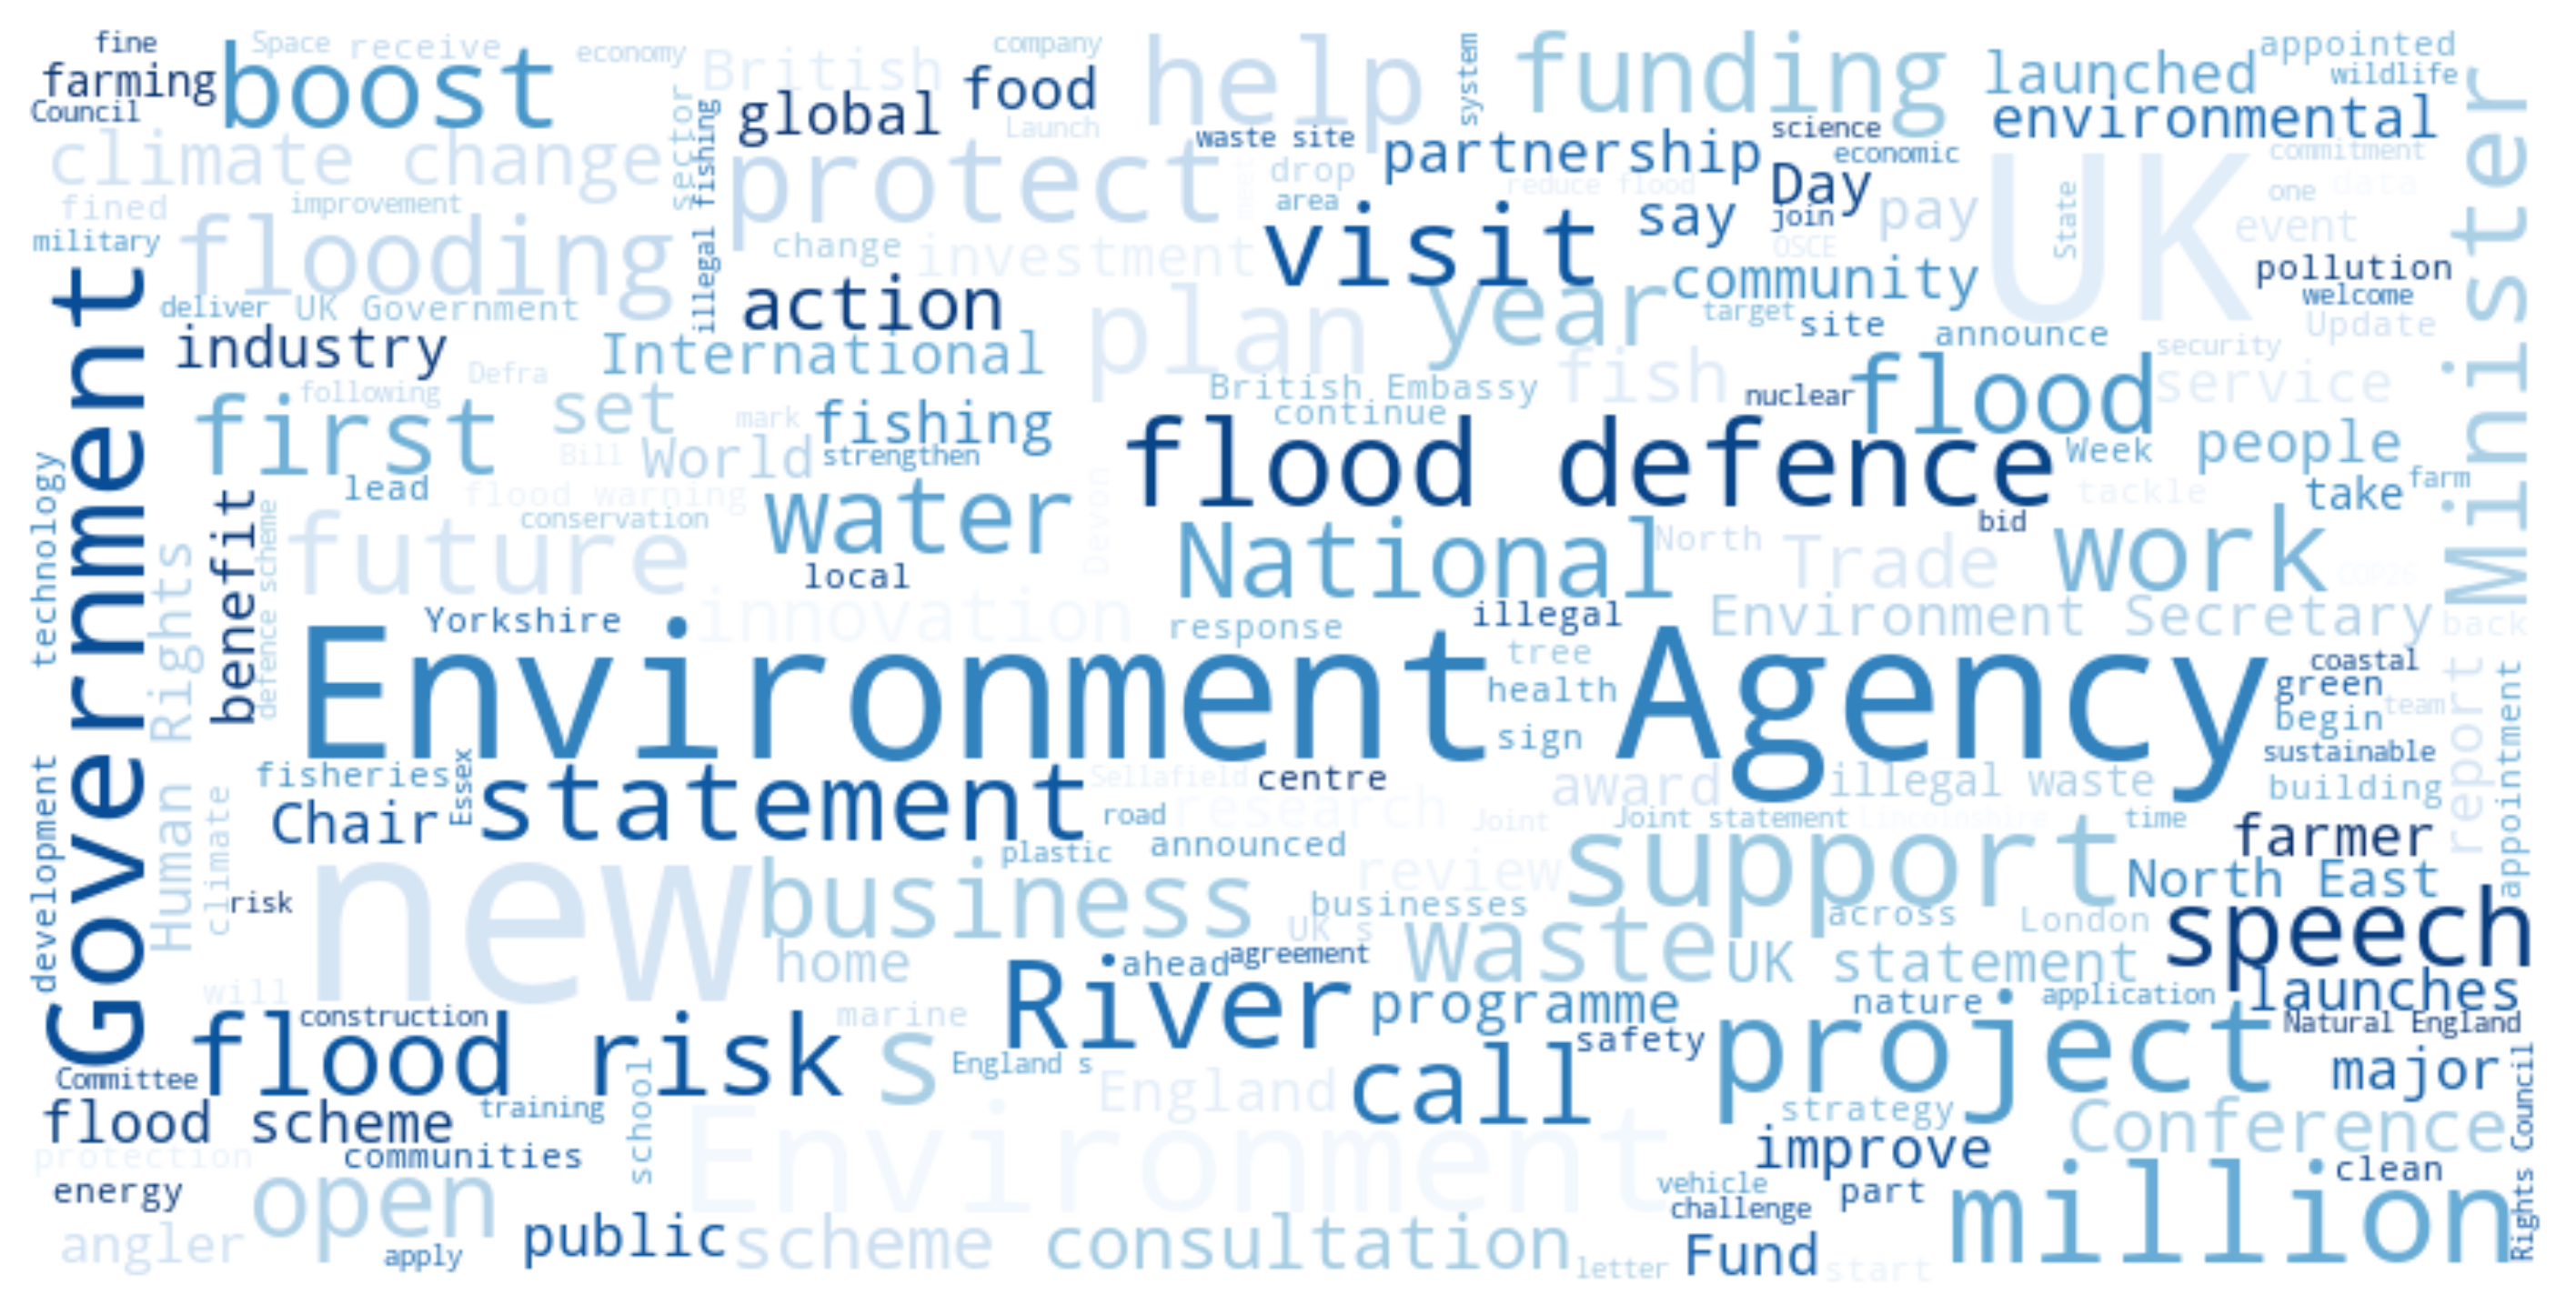

In [104]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image

# Concatenate all the text in the 'title' column into a single string
text = ' '.join(df['title'].astype(str))

# Create a WordCloud object with maximum font size, width, and white background
wordcloud = WordCloud(max_font_size=80, width=800, height=400, background_color='white', colormap='Blues').generate(text)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Display the word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# Save the plot as an image file using PIL
fig.savefig('/project/Old_Version/my_dir/Fausse-repose/Topic-Modelling-for-the-EA-2021/Data/Png/plot_Title_cloud.png', dpi=300, bbox_inches='tight')

# Close the plot
plt.close()

# Open the saved image
image = Image.open('/project/Old_Version/my_dir/Fausse-repose/Topic-Modelling-for-the-EA-2021/Data/Png/plot_Title_cloud.png')
image.show()


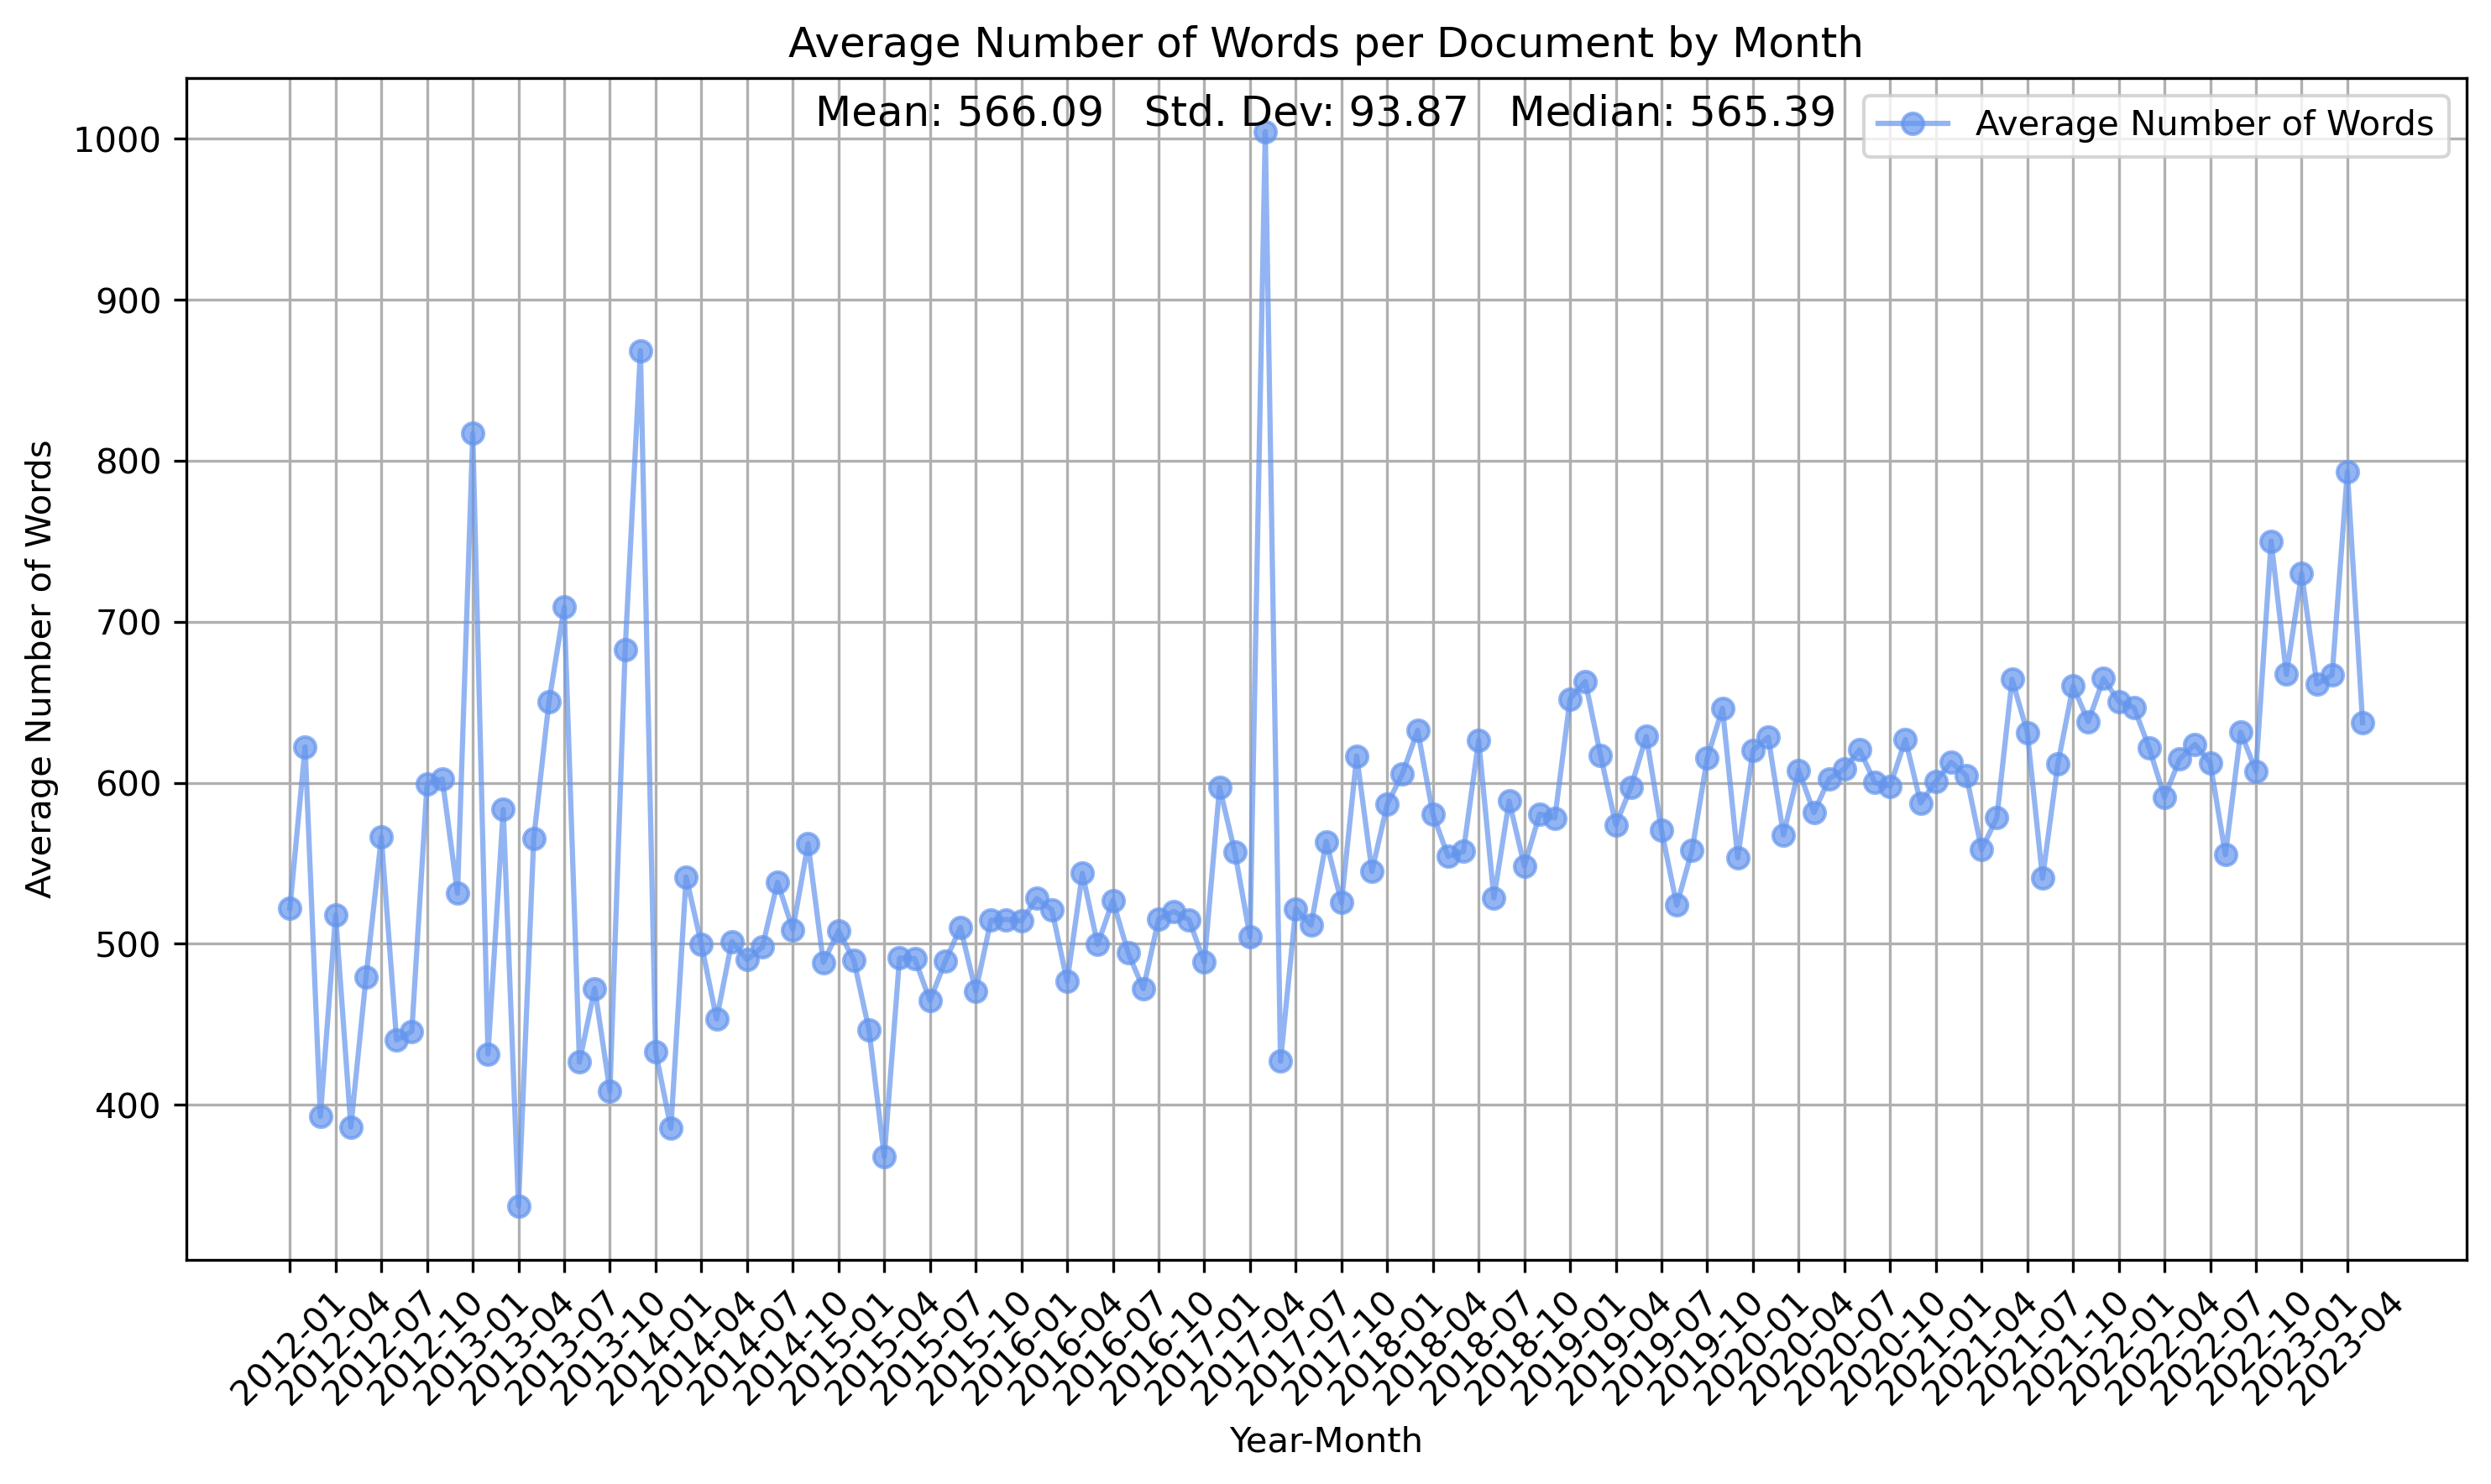

In [3]:
import matplotlib.pyplot as plt
from PIL import Image

import pandas as pd

# Convert the 'year-month' column to a pandas PeriodIndex
df['year-month'] = pd.PeriodIndex(df['year-month'], freq='M')

# Group the data by month and count the occurrences
monthly_counts= df['year-month'].value_counts().sort_index()

# Convert the Period object to a string representation
monthly_counts.index = monthly_counts.index.astype(str)

# Filter the DataFrame for dates from 2015 onwards
start_date = '2015-01'
monthly_counts_filtered = monthly_counts[start_date:]

# Create a line plot to visualize the occurrence of months
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(monthly_counts_filtered.index, monthly_counts_filtered.values, marker='o', linestyle='-', color='b')

# Set labels and title for the plot
plt.xlabel('Year-Month')
plt.ylabel('Occurrences')
plt.title('Occurrences of articles by Month')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Select a subset of x-axis labels to display
x_ticks = monthly_counts_filtered.index[::3]  # Show labels for every 3 months
plt.xticks(x_ticks)

# Add gridlines
plt.grid(True)

# Add data labels
for i, value in enumerate(monthly_counts_filtered.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Add a legend (optional)
plt.legend(['Occurrences'])

# Add a tight layout
plt.tight_layout()

# Save the plot as an image file using PIL
fig = plt.gcf()
fig.savefig('/project/Old_Version/my_dir/Fausse-repose/Topic-Modelling-for-the-EA-2021/Data/Png/plot_occurences.png', dpi=300, bbox_inches='tight')

# Close the plot
plt.close()

# Open the saved image
image = Image.open('/project/Old_Version/my_dir/Fausse-repose/Topic-Modelling-for-the-EA-2021/Data/Png/plot_occurences.png')
image.show()


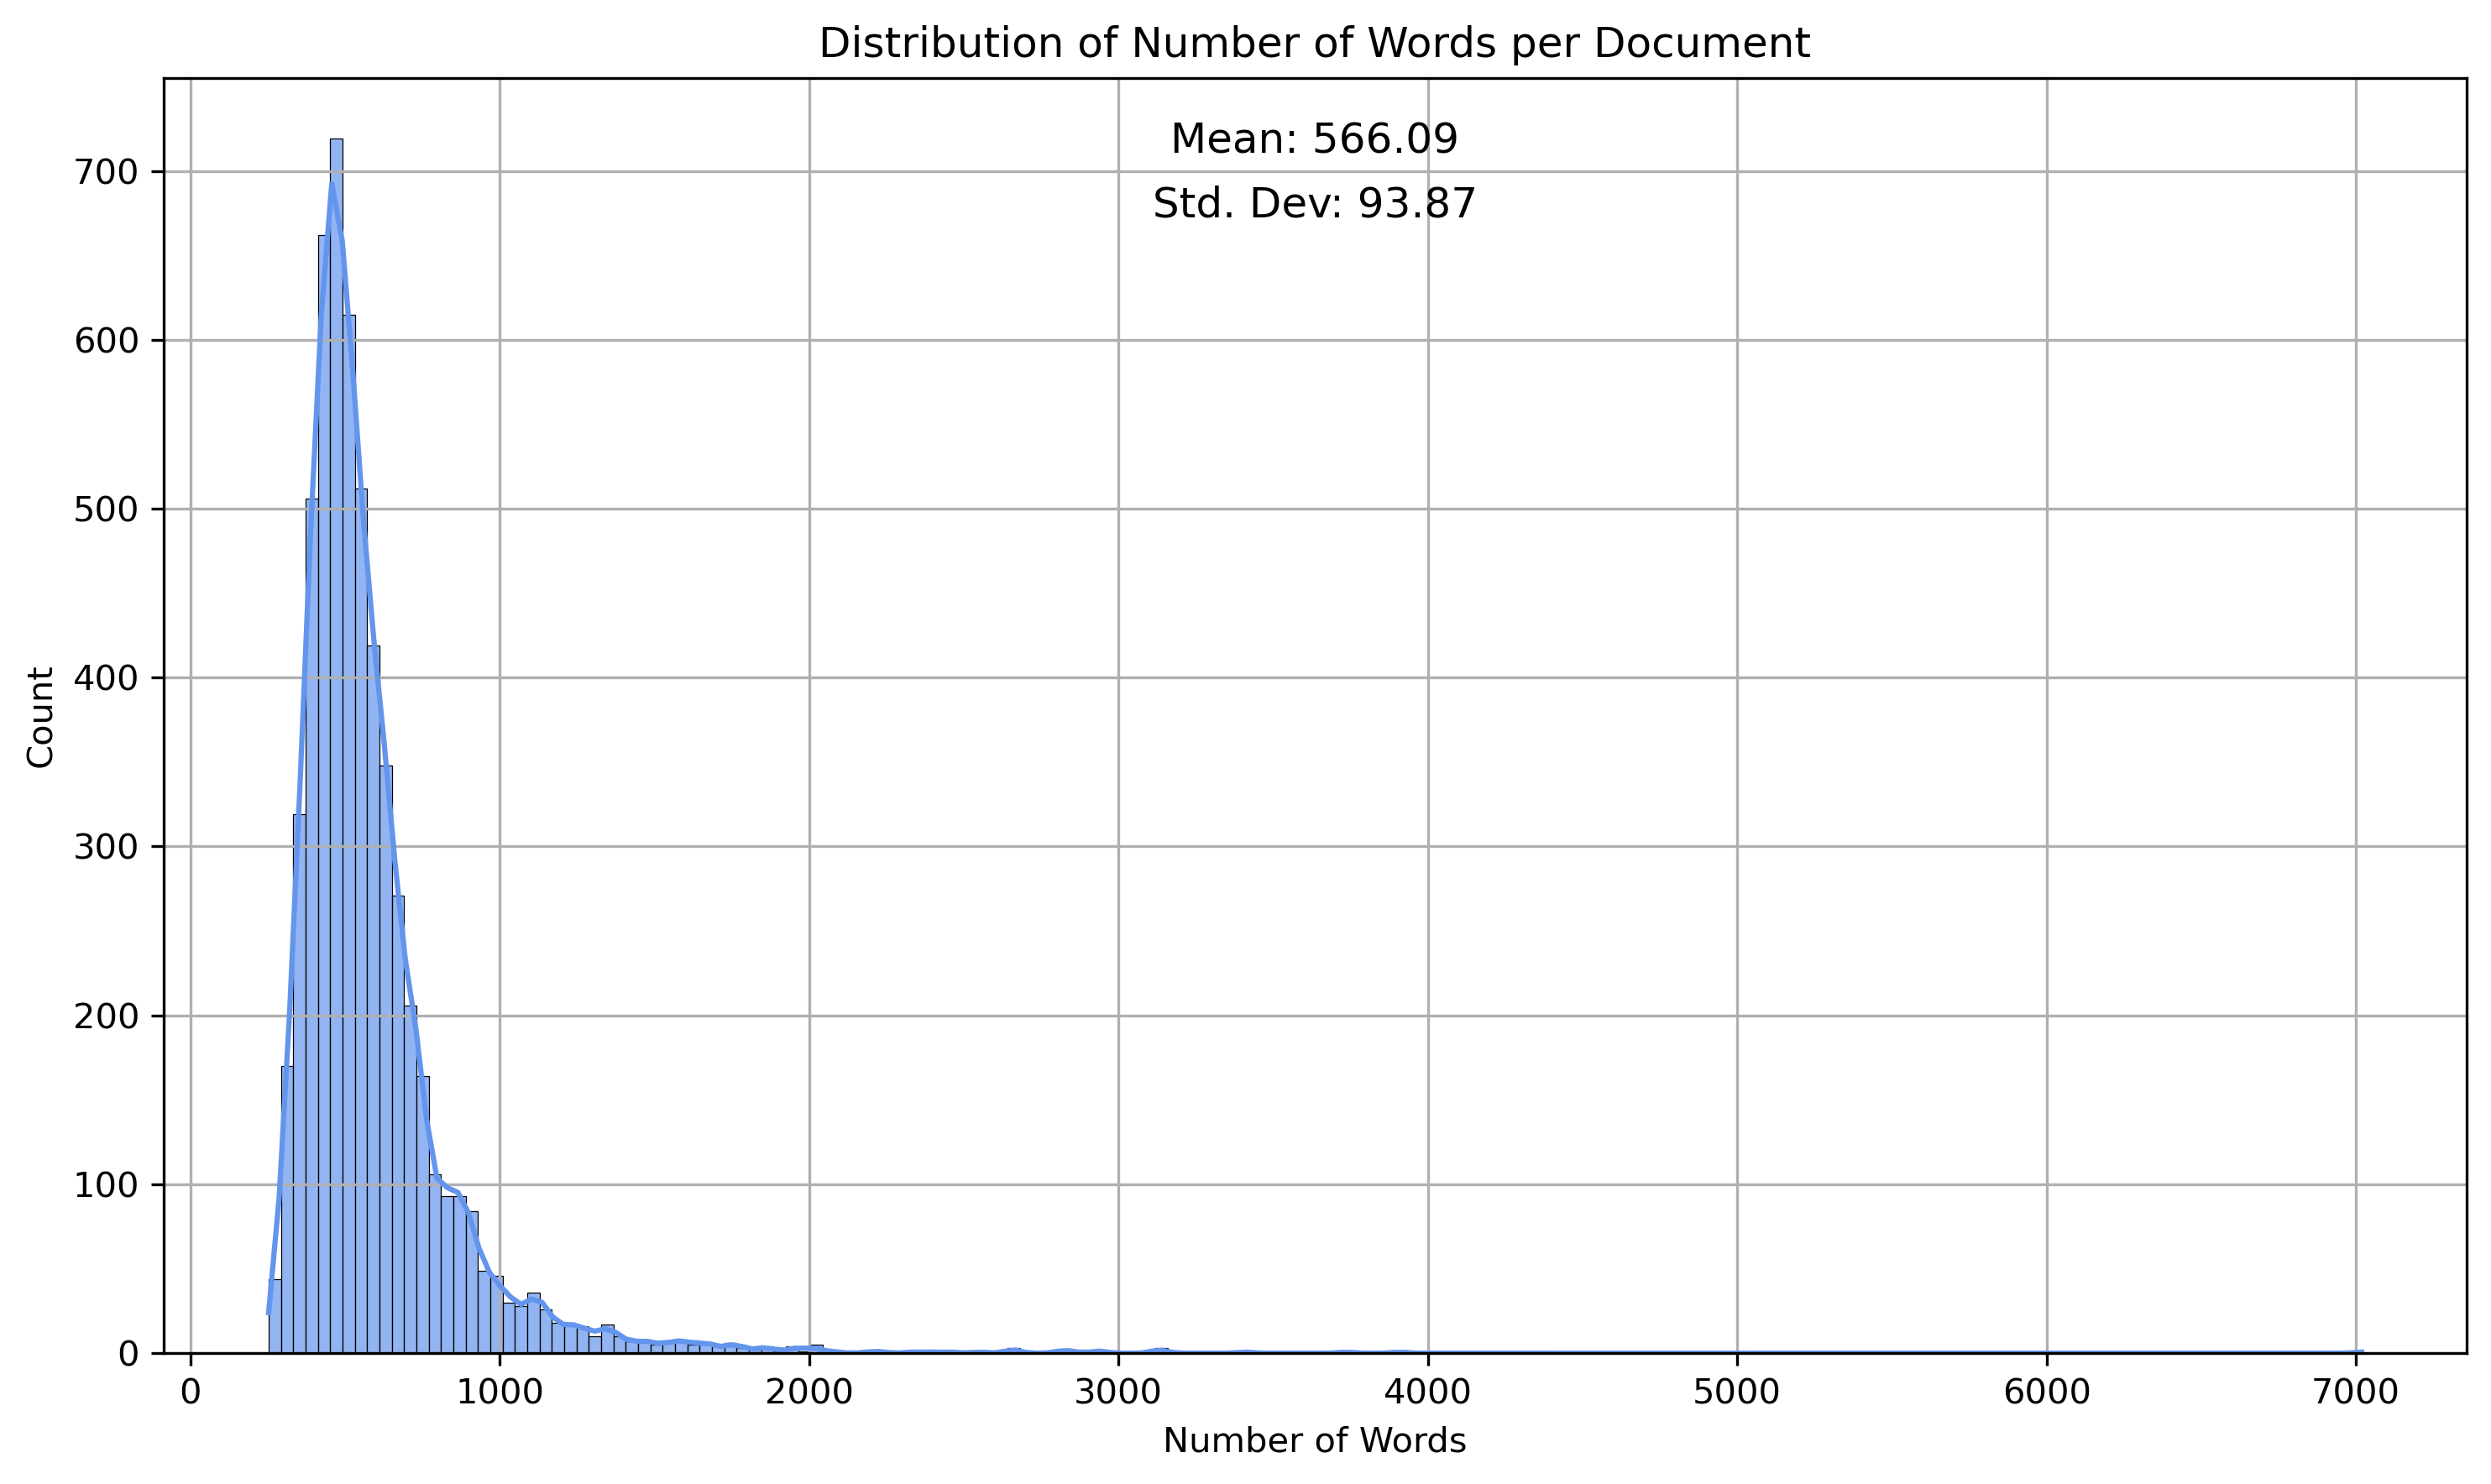

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of words in each document
df['num_words'] = df['content'].apply(lambda x: len(x))

# Plot the distribution of the number of words per document using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='num_words', kde=True)

# Set x-axis and y-axis labels and title
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.title('Distribution of Words per Document')

# Save the plot as an image file using PIL
fig = plt.gcf()
fig.savefig('/project/Old_Version/my_dir/Fausse-repose/Topic-Modelling-for-the-EA-2021/Data/Png/Distribution_Number_Words_Per_Document.png', dpi=300, bbox_inches='tight')

# Close the plot
plt.close()

# Open the saved image
image = Image.open('/project/Old_Version/my_dir/Fausse-repose/Topic-Modelling-for-the-EA-2021/Data/Png/Distribution_Number_Words_Per_Document.png')
image.show()
